<a href="https://colab.research.google.com/github/mariuszkx5/ML-Projects/blob/master/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
df = pd.read_csv('Mall_Customers.csv')

In [0]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

Gender

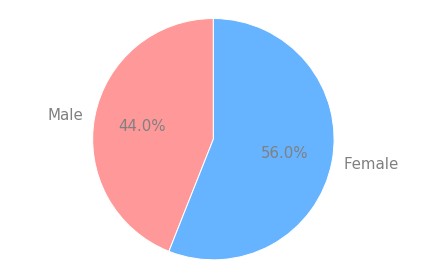

In [0]:
import matplotlib.pyplot as plt
# Pie chart

labels = ['Male', 'Female']
sizes = [df['Gender'].value_counts()['Male'], df['Gender'].value_counts()['Female']]

colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    text.set_size(15)

for autotext in autotexts:
    autotext.set_color('grey')
    autotext.set_size(15)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Age of customers

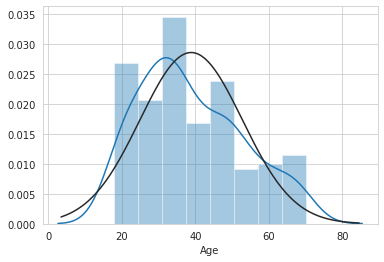

In [0]:
import seaborn as sns
from scipy import stats

sns.distplot(df['Age'], fit=stats.norm, kde=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8f4e0ddf60>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8f4e0f2128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f4e0f2eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f4e0f25f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8f4e48b128>,
  <matplotlib.lines.Line2D at 0x7f8f4e40da58>]}

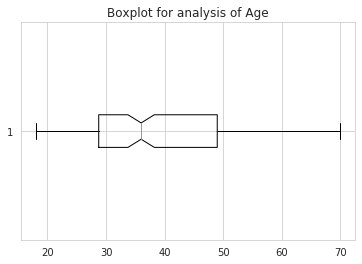

In [0]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot for analysis of Age')
ax1.boxplot(df['Age'], vert=False, notch=True)

Annual Income (Roczny przychód)

Text(0, 0.5, 'Density')

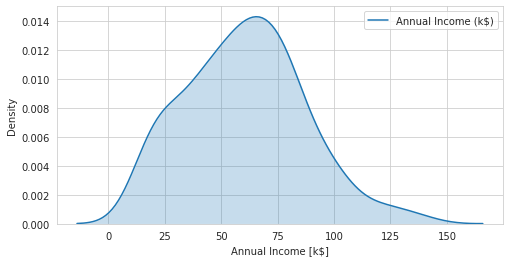

In [0]:
fig2, ax2 = plt.subplots()
sns.set_style('whitegrid')
fig2.set_size_inches(8, 4)
sns.kdeplot(df['Annual Income (k$)'], shade=True)

ax2.set_xlabel('Annual Income [k$]')
ax2.set_ylabel('Density')

Analyzing Spending Score of the Customers

{'boxes': [<matplotlib.lines.Line2D at 0x7f8f4eaa7828>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8f4eaae160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f4eaaebe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f4eaae860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8f4eaa79b0>,
  <matplotlib.lines.Line2D at 0x7f8f4eaa7da0>]}

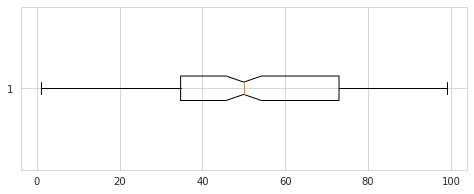

In [0]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8, 3)
ax3.boxplot(df['Spending Score (1-100)'], vert=False, notch = True)

# Data set preparation

In [0]:
gender_list = []

for gender in df['Gender']:
  if gender == 'Male':
    g = 1
  else:
    g = 0
  gender_list.append(g)

df['Gender'] = gender_list

df.drop(columns='CustomerID', inplace=True)

df.fillna(value=df.mean(), inplace=True)

# Choosing the best segmentation model

## K-means clustering

**Determining Optimal number of Clusters**

Elbow method

To determin the optimal number of clusters the Elbow methods use only the SSW index

In [0]:
from sklearn.cluster import KMeans

range_n_clusters = range(2, 11) 

SSW = []
for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state = 0)
  kmeans.fit(df)
  SSW.append(kmeans.inertia_)

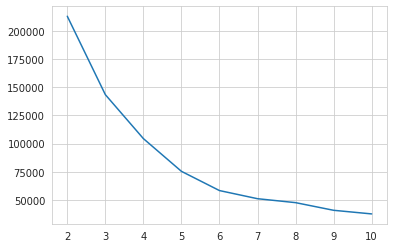

In [0]:
fig4, ax4 = plt.subplots()
ax4.plot(range_n_clusters, SSW)

From the above graph, I conclude that 4 or 5 or 6 are the appropriate numbers of clusters since it seems to be appearing at the bend in the elbow plot.

Average Silhouette Method

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

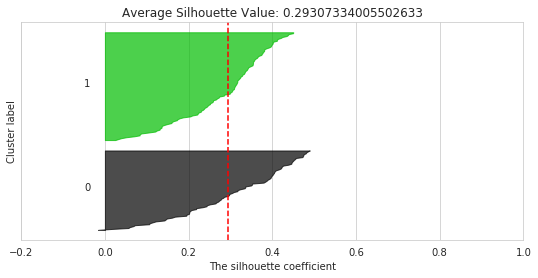

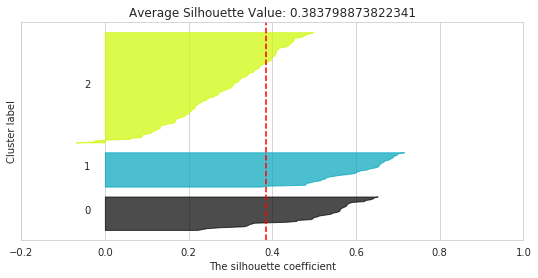

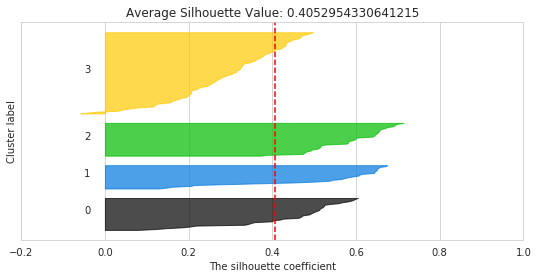

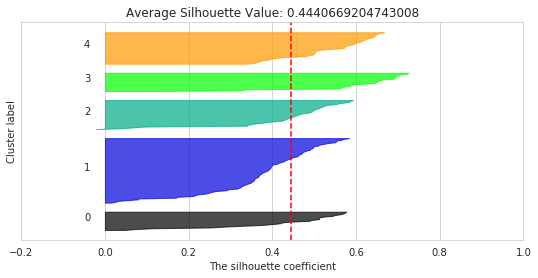

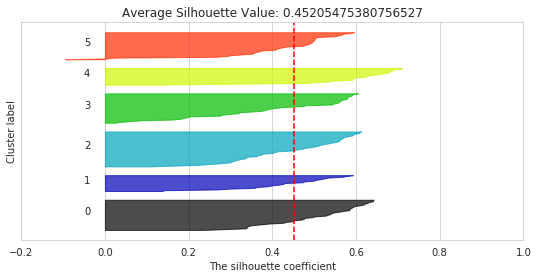

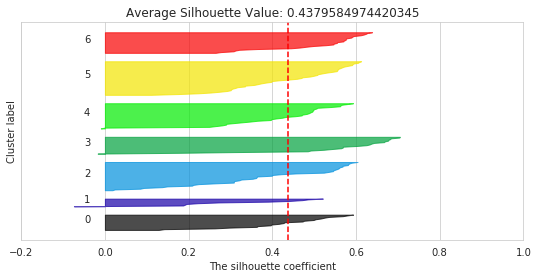

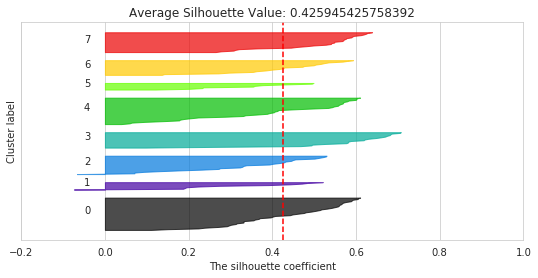

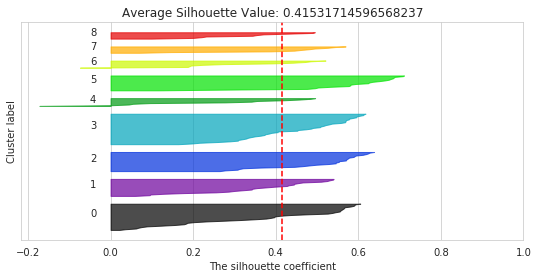

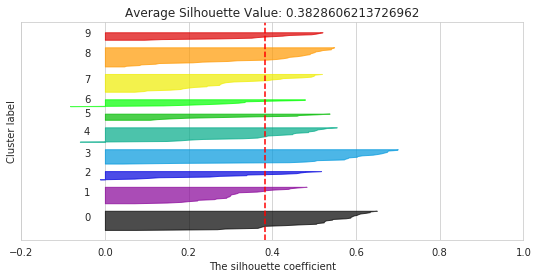

In [0]:
silhouette_avg_memory = []

for n_clusters in range_n_clusters:
  fig, ax = plt.subplots()
  fig.set_size_inches(9,4)

  kmeans = KMeans(n_clusters = n_clusters)
  cluster_labels = kmeans.fit_predict(df)

  silhouette_avg = silhouette_score(df, cluster_labels)
  silhouette_avg_memory.append(silhouette_avg)

  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)

  sample_silhouette_values = silhouette_samples(df, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax.set_title("Average Silhouette Value: {}".format(silhouette_avg))
  ax.set_xlabel("The silhouette coefficient")
  ax.set_ylabel("Cluster label")

  ax.set_yticks([])  # Clear the yaxis labels / ticks
  ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])



Text(0, 0.5, 'Average Silhouette Value')

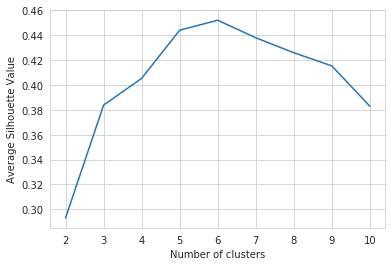

In [0]:
fig, ax = plt.subplots()
ax.plot(range_n_clusters, silhouette_avg_memory)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Value')

It seems that the best number of clusters is 6.

# Visualizing the Clustering Results

I decided to choose the number of clusters equeals **6**

Text(0.5, 1.0, 'Sample Visualization of Segmentation as a Function of Only Two Variables')

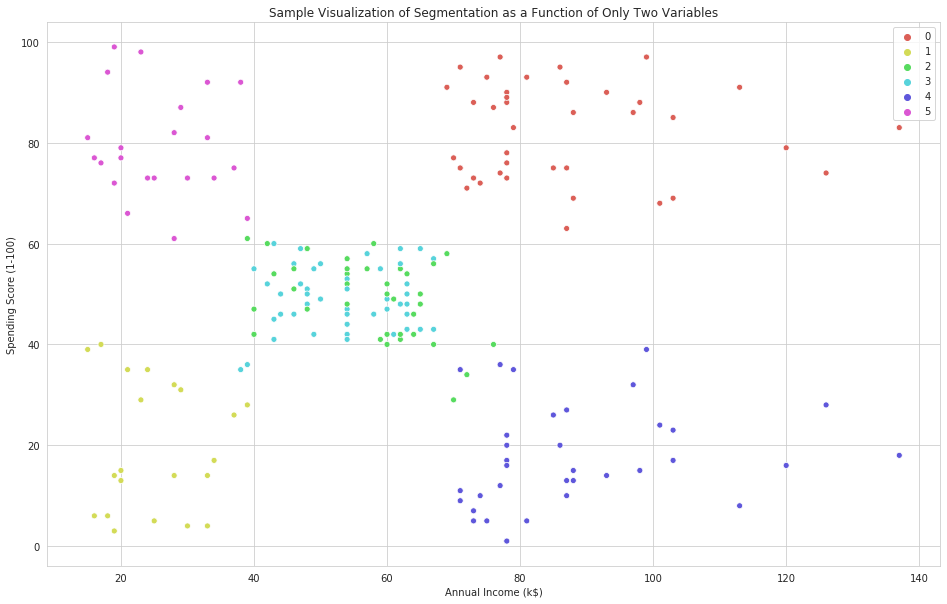

In [0]:
kmeans = KMeans(n_clusters = 6)
cluster_labels = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=cluster_labels, palette=sns.color_palette("hls", 6))
ax.set_title('Sample Visualization of Segmentation as a Function of Only Two Variables')


# Conclusion



> The disadvantage of the K-means clustering algorithm is the need to designate the number of optimal clusters as a model hyperparameter


> Based on the Elbow and Average Silhouette Methods it turned out that  6 is the optimal number of clusters for customer segmentation problem being considered.


> A potentially better solution could be the SOM model that does not need a predetermined number of clusters. Moreover, it is soft clustering method, which gives more complete information as to the certainty of belonging to a given cluster.


